In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import numpy as np


In [12]:
iris = load_iris()
X = iris.data
y = iris.target

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


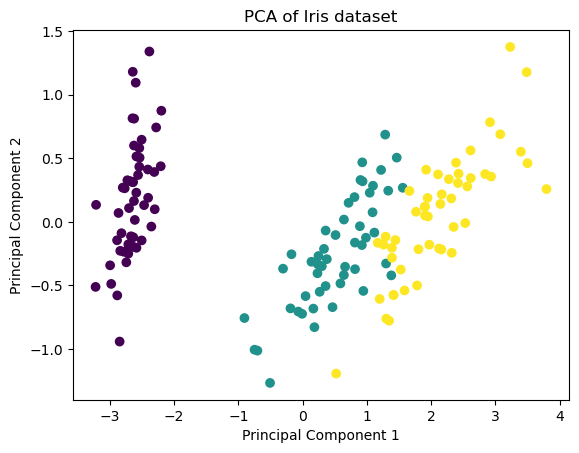

In [14]:
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris dataset')

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')


# PCA FROM SCRATCH


In [24]:
X=pd.DataFrame(X)
X
cov=X.corr()

In [25]:
cov

,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


In [26]:
eigen_values , eigen_vectors = np.linalg.eigh(cov)
#What do eigen vector & eigen value signify? (in the case of PCA)
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:,sorted_index]

In [27]:
#WHY just 2 components? How to identify how many components we need?
n_components=2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [28]:
X_meaned = X - np.mean(X , axis = 0)

In [29]:
#Why do we multiply?
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()


In [30]:
X_reduced

array([[ 2.43965084e+00,  3.51654452e-03],
       [ 2.40919030e+00, -5.33614808e-01],
       [ 2.62531429e+00, -4.26888360e-01],
       [ 2.53440351e+00, -5.52061366e-01],
       [ 2.51869218e+00,  5.81043489e-02],
       [ 2.10397481e+00,  5.06795973e-01],
       [ 2.61676340e+00, -2.70827631e-01],
       [ 2.40678138e+00, -1.24105622e-01],
       [ 2.64278852e+00, -8.14653182e-01],
       [ 2.43456939e+00, -4.45530280e-01],
       [ 2.27915925e+00,  3.03850122e-01],
       [ 2.45295325e+00, -1.97139984e-01],
       [ 2.51778255e+00, -5.78050769e-01],
       [ 2.95243944e+00, -7.74107059e-01],
       [ 2.32566104e+00,  7.24458383e-01],
       [ 2.19841138e+00,  1.07677077e+00],
       [ 2.33614005e+00,  4.96999329e-01],
       [ 2.38316519e+00,  1.02107432e-02],
       [ 1.97720594e+00,  5.20997493e-01],
       [ 2.40592811e+00,  2.89648602e-01],
       [ 2.08227240e+00,  3.17597460e-02],
       [ 2.32250771e+00,  2.04013235e-01],
       [ 2.95928378e+00, -1.02659341e-01],
       [ 2.

In [31]:
X_reduced.shape

(150, 2)

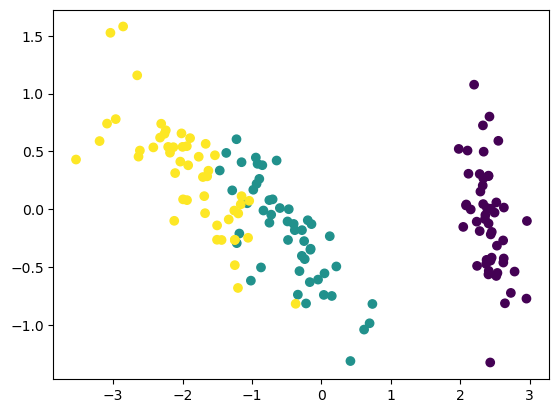

In [34]:
plt.scatter(X_reduced[:,0],X_reduced[:,1], c=y, cmap='viridis')

# Reconstructing the original data (PCA reversed)

In [38]:



pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_original1 = np.dot(X_pca, pca.components_) + pca.mean_

In [ ]:
X_original1
